# Global Green Energy Part 3: Dynamic Systems & Advanced Visualization 📊

Taking our analysis into the temporal dimension, we're exploring how energy systems evolve over time and interact with economic development. This section combines correlation analysis with animated visualizations to reveal the dynamic relationships between wealth, emissions, and renewable adoption across countries and years.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# load in data
raw_data = pd.read_csv('global_sustainable_energy_data.csv')

#display(raw_data.sample(4))
raw_data.info()

# data looks good, let's visuailise it. 
df = raw_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

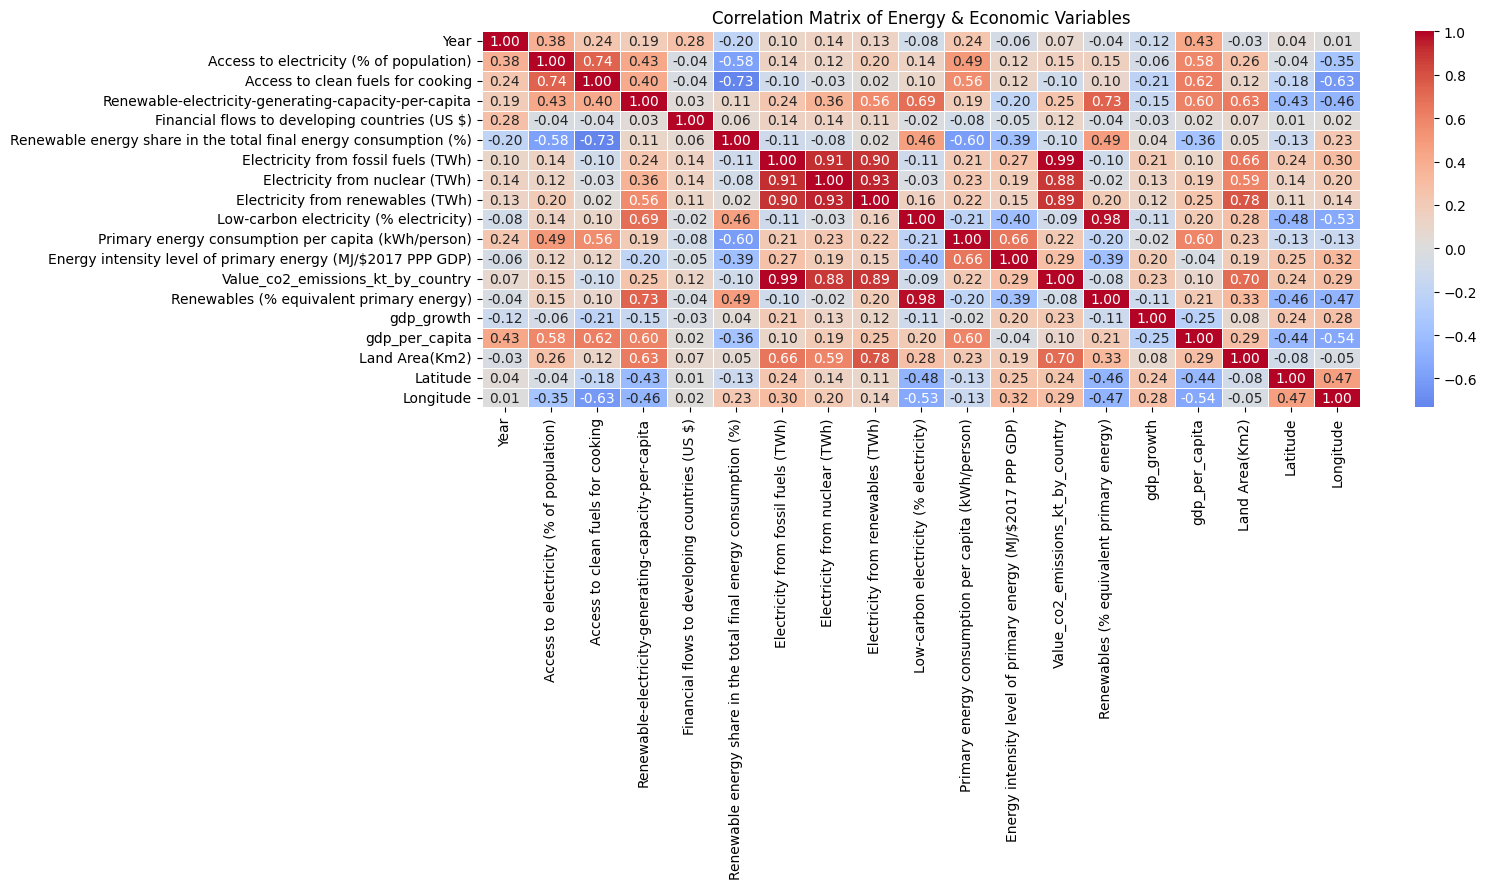

In [3]:
# Select only numeric columns
df_num = df.select_dtypes(include="number")

# Drop missing values (or fillna if needed)
df_corr = df_num.dropna()

# Correlation matrix
corr_matrix = df_corr.corr()

# Plot
plt.figure(figsize=(16, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Energy & Economic Variables")
plt.tight_layout()
plt.show()


## Understanding Energy System Interconnections

The correlation matrix reveals the complex web of relationships within national energy systems:
- **System thinking** - energy choices don't exist in isolation but are deeply interconnected with economic development, environmental outcomes, and social infrastructure
- **Policy leverage points** - identifying which variables are most strongly correlated helps policymakers understand where interventions might have cascading effects across the entire energy system

In [9]:
# Get latest year with valid renewable share
df_latest = (
    df.dropna(subset=["Renewables (% equivalent primary energy)"])
    .sort_values("Year")
    .groupby("Entity")
    .tail(1)
)

# Rename for Plotly compatibility
df_latest = df_latest.rename(columns={"Entity": "country"})

# Plot
fig = px.choropleth(
    df_latest,
    locations="country",
    locationmode="country names",
    color="Renewables (% equivalent primary energy)",
    hover_name="country",
    color_continuous_scale="YlGn",
    title="Renewable Energy Share by Country (Most Recent Year)",
    range_color=[0, 100]
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    width=1400,
    height=600,
    margin={"r":0,"t":50,"l":0,"b":0}
)
fig.show()


In [12]:
# Clean: keep only rows with % renewable and country info
df_anim = df.dropna(subset=["Renewables (% equivalent primary energy)"])

# Rename for Plotly
df_anim = df_anim.rename(columns={"Entity": "country"})

# Plot animated map
fig = px.choropleth(
    df_anim,
    locations="country",
    locationmode="country names",
    color="Renewables (% equivalent primary energy)",
    hover_name="country",
    animation_frame="Year",  # 👈 Time slider!
    color_continuous_scale="YlGn",
    range_color=[0, 100],
    title="Animated: Renewable Energy Share by Country (Over Time)"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    width=1400,
    height=600,
    margin={"r":0,"t":50,"l":0,"b":0}
)
fig.show()


## Time Reveals Hidden Patterns

Animation transforms static geographic data into dynamic stories of energy transition:
- **Transition velocities** - countries don't just differ in their current renewable shares but in how quickly they're changing, revealing leaders in transition speed versus absolute adoption
- **Policy timing** - the animated timeline can help identify when specific countries made major renewable pushes, potentially linking policy interventions to observable changes in the data

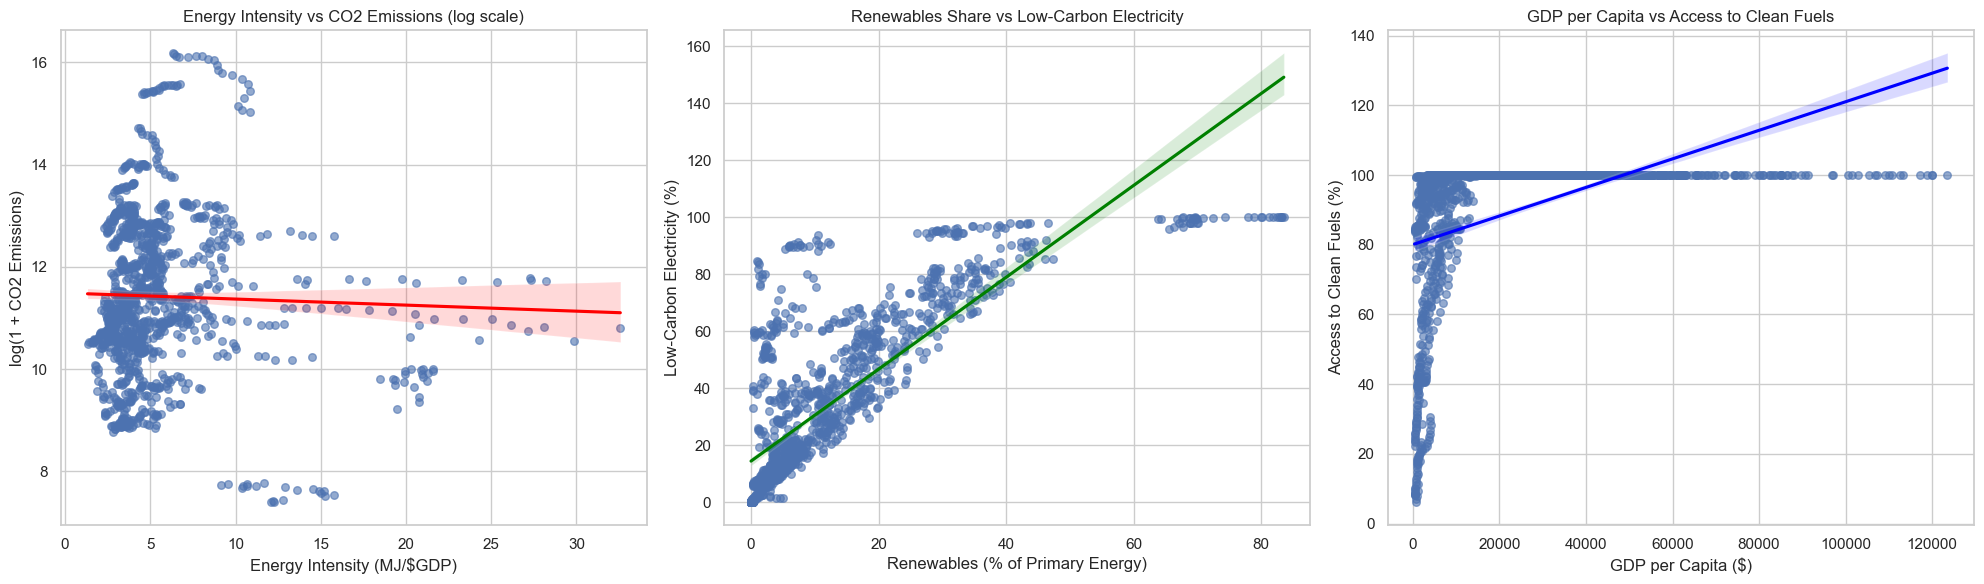

In [17]:
# Rename for easier reference
df = df.rename(columns={
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": "Energy Intensity",
    "Value_co2_emissions_kt_by_country": "CO2 Emissions",
    "Renewables (equivalent primary energy)": "Renewables %",
    "Low-carbon electricity (electricity)": "Low-Carbon %",
    "gdp_per_capita": "GDP per Capita",
    "Access to clean fuels for cooking": "Clean Fuel Access (%)"
})

# Drop rows with missing required columns
df_clean = df.dropna(subset=[
    "Energy Intensity",
    "CO2 Emissions",
    "Renewables %",
    "Low-Carbon %",
    "GDP per Capita",
    "Clean Fuel Access (%)"
])

# Optional log transform for CO2 (skewed)
df_clean = df_clean.copy()
df_clean["Log CO2 Emissions"] = np.log1p(df_clean["CO2 Emissions"])

# Set style
sns.set(style="whitegrid")

# Create figure
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# 1. Energy Intensity vs CO2 (log-transformed)
sns.regplot(
    data=df_clean,
    x="Energy Intensity",
    y="Log CO2 Emissions",
    ax=axs[0],
    line_kws={"color": "red"},
    scatter_kws={"s": 30, "alpha": 0.6}
)
axs[0].set_title("Energy Intensity vs CO2 Emissions (log scale)")
axs[0].set_ylabel("log(1 + CO2 Emissions)")
axs[0].set_xlabel("Energy Intensity (MJ/$GDP)")

# 2. Renewables % vs Low-Carbon %
sns.regplot(
    data=df_clean,
    x="Renewables %",
    y="Low-Carbon %",
    ax=axs[1],
    line_kws={"color": "green"},
    scatter_kws={"s": 30, "alpha": 0.6}
)
axs[1].set_title("Renewables Share vs Low-Carbon Electricity")
axs[1].set_xlabel("Renewables (% of Primary Energy)")
axs[1].set_ylabel("Low-Carbon Electricity (%)")

# 3. GDP per Capita vs Clean Fuel Access
sns.regplot(
    data=df_clean,
    x="GDP per Capita",
    y="Clean Fuel Access (%)",
    ax=axs[2],
    line_kws={"color": "blue"},
    scatter_kws={"s": 30, "alpha": 0.6}
)
axs[2].set_title("GDP per Capita vs Access to Clean Fuels")
axs[2].set_xlabel("GDP per Capita ($)")
axs[2].set_ylabel("Access to Clean Fuels (%)")

plt.tight_layout()
plt.show()


## Key Findings
1. Energy Intensity vs CO₂ Emissions:
Although energy intensity — the amount of energy used per unit of economic output — might seem like a clear driver of emissions, the relationship is surprisingly weak when emissions are viewed on a logarithmic scale. This suggests that simply being more or less energy-efficient doesn't directly correspond to higher or lower CO₂ output. Many countries with low intensity may still emit large amounts of CO₂ if their energy mix is fossil-heavy, while others with high intensity may rely more on renewables or nuclear. This implies that emissions are more strongly driven by absolute energy use, population scale, and the carbon content of fuels rather than efficiency alone.

2. Renewables Share vs Low-Carbon Electricity:
There is a very strong and direct positive correlation between a country’s share of renewables in its energy mix and its percentage of low-carbon electricity. This reflects the fact that renewables (like solar, wind, and hydro) form the backbone of most countries’ low-carbon strategies, often contributing more than nuclear in recent years. The tight alignment shows that increasing renewable capacity has an immediate and proportional impact on reducing the carbon intensity of electricity, affirming the effectiveness of policy and investment in clean energy.

3. GDP per Capita vs Access to Clean Fuels:
Access to clean fuels for cooking is tightly linked to a country’s wealth, with higher GDP per capita consistently associated with higher access rates. This trend underscores how infrastructure development, household energy affordability, and national policy are typically better in richer nations. However, the relationship begins to plateau as countries reach near-universal access, suggesting that past a certain income threshold, clean energy access becomes more about maintenance and equity than economic growth. The strongest gaps remain in low-income countries, where targeted aid and infrastructure support could have the most impact.

In [19]:
df = raw_data.copy()

# Clean relevant columns
df_anim = df.dropna(subset=[
    "Value_co2_emissions_kt_by_country",
    "gdp_per_capita",
    "Renewables (% equivalent primary energy)",
    "Entity",
    "Year"
])

# Rename for compatibility
df_anim = df_anim.rename(columns={
    "Entity": "Country",
    "Value_co2_emissions_kt_by_country": "CO2 Emissions (kt)",
    "gdp_per_capita": "GDP per Capita",
    "Renewables (% equivalent primary energy)": "Renewables (%)"
})

# Create animated scatter plot
fig = px.scatter(
    df_anim,
    x="GDP per Capita",
    y="CO2 Emissions (kt)",
    animation_frame="Year",
    animation_group="Country",
    size="Renewables (%)",
    color="Country",
    hover_name="Country",
    log_y=True,
    size_max=30,
    range_x=[0, df_anim["GDP per Capita"].max()],
    range_y=[1e2, df_anim["CO2 Emissions (kt)"].max()],
    title="GDP vs CO₂ Emissions (Bubble Size = Renewable Share)"
)

fig.update_layout(width=950, height=600)
fig.show()


## Dynamic Visualization Synthesis

The animated bubble chart brings together multiple dimensions to reveal the complexity of sustainable development:
- **Multi-dimensional stories** - combining wealth, emissions, and renewable adoption in a single animated view shows how countries navigate different pathways through the development-environment tradeoff
- **Temporal trajectories** - watching bubbles move over time reveals that the relationship between economic growth and environmental impact isn't fixed - countries can "decouple" growth from emissions through renewable adoption
- **Policy possibilities** - seeing how bubble size (renewable share) changes relative to position (wealth vs emissions) demonstrates that renewable transitions are possible at different stages of economic development
- **Analytical evolution** - this multi-layered approach represents the frontier of energy data analysis, moving beyond static correlations to dynamic, interactive exploration of complex global systems